it took on average `274 secs` to generate `1000 synthetic samples`.

500 * 274 => 38 hours

In [1]:
import pandas as pd 
from glob import glob
import json
import numpy as np 
from func_utils.plot_utils import show_image
import matplotlib.pyplot as plt 
import os 

def read_json(fname, encoding='utf-8'):
    data = []

    # Open the JSONL file and read each line
    with open(fname, 'r', encoding=encoding) as f:
        for line in f:
            try:
                # Parse each line as a JSON object
                data.append(json.loads(line))
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON on line: {line}")
                print(f"Error: {e}")
    return data

In [2]:
path = r'synthdog\outputs\SynthDoG_pt\validation\metadata.jsonl'
data = read_json(path)
data[0]

{'file_name': 'image_7.jpg',
 'ground_truth': '{"gt_parse": {"text_sequence": "que somo s financeira mente saud áveis? C om que frequência f azemos uma pausa,r eunimos t odos doc ument os p essoai s e fi nancei ros par a aval"}}'}

In [4]:
import torch 
from func_utils.pydataloader import SynthDogDataset
from encoder_decoder_model import init_dit_bart_models_fixed

def get_synth_images_json_path(data_root= os.path.join('synthdog','outputs'), split='train'):
    ipath = os.path.join(data_root, '*', split, '*.jpg')
    json_path = os.path.join(data_root, '*', split, 'metadata.jsonl')

    return glob(ipath), glob(json_path)


torch.cuda.empty_cache()

In [5]:
root_path = os.path.join('synthdog', 'outputs_ol')
train_ipath, train_json_metadata = get_synth_images_json_path(data_root=root_path, split='train')
val_ipath, val_json_metadata = get_synth_images_json_path(data_root=root_path, split='validation')
test_ipath, test_json_metadata = get_synth_images_json_path(data_root=root_path, split='test')
processor, text_tokenizer, model = init_dit_bart_models_fixed()
model.gradient_checkpointing_enable()

peak_mem = torch.cuda.max_memory_allocated()
print(f"The model as is is holding: {peak_mem / 1024**3:.2f} of GPU RAM")


# encoder_decoder_model = configure_model(encoder_decoder_model, text_tokenizer, inference = False)
# encoder_decoder_model.gradient_checkpointing_disable()

# # Fix GPT-2 config for seq2seq
# encoder_decoder_model.config.decoder_start_token_id = text_tokenizer.bos_token_id  # usually same as eos_token_id in GPT2
# encoder_decoder_model.config.pad_token_id = text_tokenizer.pad_token_id
# encoder_decoder_model.config.eos_token_id = text_tokenizer.eos_token_id

# Important: set vocab size for decoder
# encoder_decoder_model.config.vocab_size = encoder_decoder_model.config.decoder.vocab_size

Some weights of BartForCausalLM were not initialized from the model checkpoint at facebook/bart-base and are newly initialized: ['lm_head.weight', 'model.decoder.embed_tokens.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Fetching 1 files: 100%|██████████| 1/1 [00:00<?, ?it/s]
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
c:\Users\jaabi\Documents\comudel\ocr\venv\Lib\site-packages\transformers\image_processing_base.py:410: UserWarning: The following named arguments are not valid for `BeitImageProcessor.__init__` and were ignored: 'reduce_labels'
  image_processor = cls(**image_processor_dict)


The model as is is holding: 0.00 of GPU RAM


In [6]:
print(model.device)
model

cpu


VisionEncoderDecoderModel(
  (encoder): BeitModel(
    (embeddings): BeitEmbeddings(
      (patch_embeddings): BeitPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): BeitEncoder(
      (layer): ModuleList(
        (0): BeitLayer(
          (attention): BeitAttention(
            (attention): BeitSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=False)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): BeitSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): BeitIntermediate(
            (dense): Linear(in_

In [ ]:
max_token_size = 512
train_synthdataset = SynthDogDataset(train_ipath, train_json_metadata, image_feature_extractor=processor, text_tokenizer=text_tokenizer, max_token_size=max_token_size)
val_synthdataset = SynthDogDataset(val_ipath, val_json_metadata, image_feature_extractor=processor, text_tokenizer=text_tokenizer, max_token_size=max_token_size)
test_synthdataset = SynthDogDataset(test_ipath, test_json_metadata, image_feature_extractor=processor, text_tokenizer=text_tokenizer, max_token_size=max_token_size)

ng some to label them as superfoods. They provide many vitamins including: A, B1, B2, B6, niacin, and C, and are rich in iodine, potassium, iron, magn esium, and calcium. In addition, commercially cultivated microalgae, i ncluding both algae and cyanobacteria, are marketed as nutritional supplements, such as spirulina, , high in beta-carote ne.Algae are national foods of many nations: China consumes more t han 70 species, including ; Ireland, dulse; Chile, cochayuy o. Laver is used to make laver bread in Wales, where it is known as ; in Korea, . It is also used along the west coast of North America from Calif ornia to British Columbia, in Hawaii and by the Mori of New Zealand. Sea lettuce and badderlocks are salad ingredients in Scotland, Ireland, Greenland, and Iceland. Algae is being considered a potential solution for world hunger problem.Two popular forms of algae are used in cuisineFurthermore it contains all nine of t he essential amino acids the body does not produce


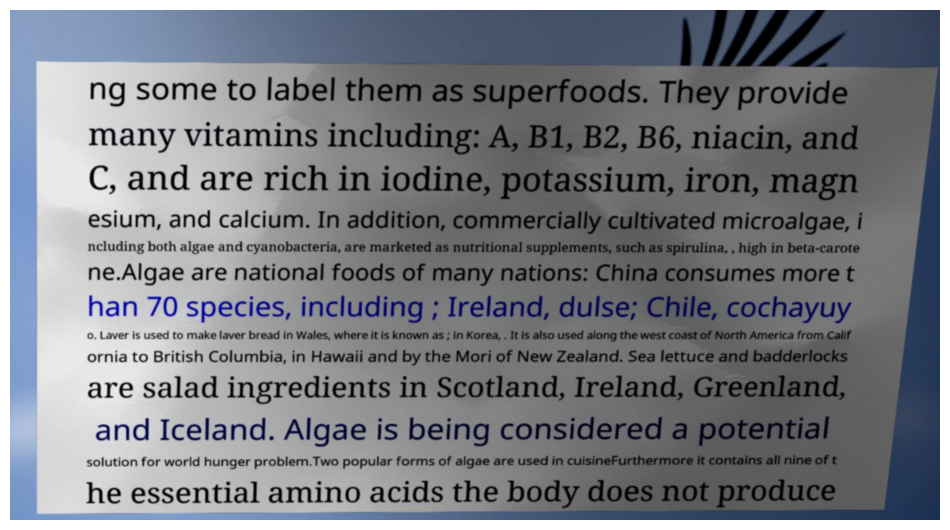

In [8]:
idx = np.random.randint(0, len(train_synthdataset))
sample = train_synthdataset[idx]
print(sample['text'])
show_image(sample['image'])

In [9]:
sample['labels']

tensor([    0,  2590,   103,     7,  6929,   106,    25,  2422, 13193,    29,
            4,   252,   694,   171, 26656,   217,    35,    83,     6,   163,
          134,     6,   163,   176,     6,   163,   401,     6,   295,  9504,
          179,     6,     8,   230,     6,     8,    32,  4066,    11, 45221,
            6, 35797,     6,  6440,     6, 16150,  2714,  4031,     6,     8,
        28221,     4,    96,  1285,     6, 23245, 30668,  5177, 31316,  4791,
            6,   939,   295, 19586,   258, 25237,     8, 39493,  2413, 42069,
            6,    32, 22472,    25, 22813, 19619,     6,   215,    25, 23425,
          922,  1243,     6,  2156,   239,    11,  6212,    12,  5901,  6457,
         3087,     4,  7083, 34211,    32,   632,  6592,     9,   171,  3949,
           35,   436, 36910,    55,   326,  1368,   260,  1510,  4707,     6,
          217, 25606,  2487,     6,   385, 32767,   131,  9614,     6,  1029,
          611,   857,  5781,  1021,     4,  1587,  2802,    16, 

In [10]:
for name, param in model.named_parameters():
    print(name)

encoder.embeddings.cls_token
encoder.embeddings.position_embeddings
encoder.embeddings.patch_embeddings.projection.weight
encoder.embeddings.patch_embeddings.projection.bias
encoder.encoder.layer.0.lambda_1
encoder.encoder.layer.0.lambda_2
encoder.encoder.layer.0.attention.attention.query.weight
encoder.encoder.layer.0.attention.attention.query.bias
encoder.encoder.layer.0.attention.attention.key.weight
encoder.encoder.layer.0.attention.attention.value.weight
encoder.encoder.layer.0.attention.attention.value.bias
encoder.encoder.layer.0.attention.output.dense.weight
encoder.encoder.layer.0.attention.output.dense.bias
encoder.encoder.layer.0.intermediate.dense.weight
encoder.encoder.layer.0.intermediate.dense.bias
encoder.encoder.layer.0.output.dense.weight
encoder.encoder.layer.0.output.dense.bias
encoder.encoder.layer.0.layernorm_before.weight
encoder.encoder.layer.0.layernorm_before.bias
encoder.encoder.layer.0.layernorm_after.weight
encoder.encoder.layer.0.layernorm_after.bias
encod

In [11]:
len(train_synthdataset), len(val_synthdataset), len(test_synthdataset)

(7997, 995, 1008)

In [12]:
from torch.utils.data import DataLoader

batch_size = 16
train_loader = DataLoader(train_synthdataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_synthdataset, batch_size=batch_size)


In [13]:
import transformers

transformers.__version__

'4.56.0'

In [14]:
from transformers import Seq2SeqTrainingArguments

per_dev_batch_size = 4
training_args = Seq2SeqTrainingArguments(
    output_dir="./encoder_decoder_outputs",
    per_device_train_batch_size=per_dev_batch_size,
    per_device_eval_batch_size=per_dev_batch_size,
    logging_strategy="steps",
    save_strategy="steps",
    logging_steps=100,
    save_steps=500,
    eval_steps=500,
    num_train_epochs=1,
    learning_rate=5e-5,
    weight_decay=0.01,
    save_total_limit=2,
    fp16=True,  # if GPU supports it
    run_name='plm_grokadam',
    predict_with_generate=True,
    gradient_accumulation_steps=2,
    generation_max_length=512,       
    generation_num_beams=4, 
)

In [15]:
from transformers import DataCollatorForSeq2Seq
import evaluate 

bleu = evaluate.load("bleu")
# rouge = evaluate.load("rouge")
cer = evaluate.load("cer")
wer = evaluate.load("wer")

# data_collator = DataCollatorForSeq2Seq(
#     tokenizer=text_tokenizer,
#     model=encoder_decoder_model,
#     padding="max_length",
#     return_tensors="pt"
# )

def compute_metrics(eval_preds):
    """
    Compute metrics for VisionEncoderDecoderModel predictions.
    
    Args:
        eval_preds: tuple (predictions, labels)
    Returns:
        dict of metrics
    """
    preds, labels = eval_preds
    
    # Decode predictions and labels
    decoded_preds = processor.batch_decode(preds, skip_special_tokens=True)
    decoded_labels = processor.batch_decode(labels, skip_special_tokens=True)
    
    # BLEU expects list of tokenized references and hypotheses
    bleu_preds = [p.split() for p in decoded_preds]
    bleu_refs = [[l.split()] for l in decoded_labels]  # list of list of references
    
    bleu_score = bleu.compute(predictions=bleu_preds, references=bleu_refs)["bleu"]
    
    # CER computes character error rate
    cer_score = cer.compute(predictions=decoded_preds, references=decoded_labels)["cer"]
    
    return {
        "bleu": bleu_score,
        "cer": cer_score
    }

In [16]:
import torch 
from transformers import Seq2SeqTrainer

def collate_fn(batch):
    # stack image features
    pixel_values = torch.stack([item['pixel_values'] for item in batch])
    
    # stack decoder output tokens as labels
    labels = torch.stack([item['labels'] for item in batch])
    labels[labels == text_tokenizer.pad_token_id] = -100  # ignore pad in loss
    
    return {
        'pixel_values': pixel_values,  # input to encoder
        'labels': labels               # target output tokens
    }

def collate_fn_ds(batch):
    # stack image features
    pixel_values = torch.stack([item['pixel_values'] for item in batch])
    
    input_ids = torch.stack([item["labels"] for item in batch])
    labels = input_ids.clone()
    labels[labels == processor.tokenizer.pad_token_id] = -100  # ignore pad in loss
    
    return {
        'pixel_values': pixel_values,  # input to encoder
        'input_ids': input_ids,
        'labels': labels               # target output tokens
    }

from torch.nn.utils.rnn import pad_sequence

def collate_fn_plm(batch):
    # Pad pixel_values if needed (see prior answer)
    pixel_values = pad_sequence(
        [item['pixel_values'] for item in batch],
        batch_first=True,
        padding_value=0.0
    )
    labels = pad_sequence(
        [item['labels'] for item in batch],
        batch_first=True,
        padding_value=processor.tokenizer.pad_token_id
    )
    input_ids = labels.clone()
    labels[labels == processor.tokenizer.pad_token_id] = -100

    result = {
        'pixel_values': pixel_values,
        'input_ids': input_ids,
        'labels': labels
    }
    return result

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_synthdataset,
    eval_dataset=val_synthdataset,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
)

In [16]:
history = trainer.train()

`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...
`loss_type=None` was set in the config but it is unrecognized. Using the default loss: `ForCausalLMLoss`.


Step,Training Loss
100,8.602500
200,7.811200
300,7.761500
400,7.727800
500,7.713700
600,7.698800
700,7.705400
800,7.682400
900,7.687200
1000,7.671900


In [17]:
def plot_loss(history):
    x = history['Training Loss']
    plt.plot(x)
    plt.title('Training Loss')

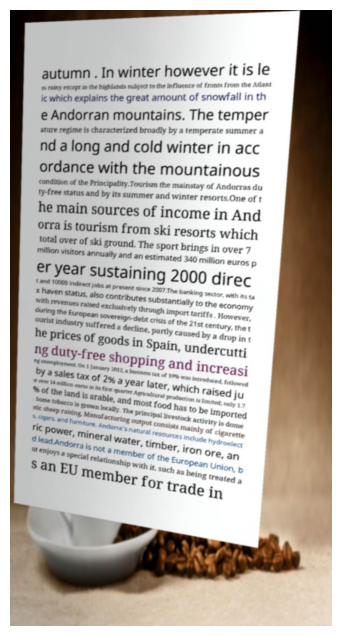

In [19]:
model.eval()
vind = np.random.randint(0, len(val_synthdataset))
sample = val_synthdataset[vind]  # or validation dataset
inputs = sample["pixel_values"].unsqueeze(0).to(model.device)
image = sample['image']
text = sample['text']
show_image(image)

In [20]:
print(text)

autumn . In winter however it is le ss rainy except in the highlands subject to the influence of fronts from the Atlant ic which explains the great amount of snowfall in th e Andorran mountains. The temper ature regime is characterized broadly by a temperate summer a nd a long and cold winter in acc ordance with the mountainous condition of the Principality.Tourism the mainstay of Andorras du ty-free status and by its summer and winter resorts.One of t he main sources of income in And orra is tourism from ski resorts which total over of ski ground. The sport brings in over 7 million visitors annually and an estimated 340 million euros p er year sustaining 2000 direc t and 10000 indirect jobs at present since 2007.The banking sector, with its ta x haven status, also contributes substantially to the economy with revenues raised exclusively through import tariffs . However, during the European sovereign-debt crisis of the 21st century, the t ourist industry suffered a decline, partly caus

In [21]:

output_ids = model.generate(inputs, max_length=100, num_beams=4)
prediction = text_tokenizer.decode(output_ids[0], skip_special_tokens=True)
print("Prediction:", prediction)
print("Ground Truth:", sample["text"])


Prediction:  the the the. the the of the.. the. of the the and the the, the the in the the to the the a the the is the the- the the as the the that the the n the the was the the for the the by the the on the the The the the with the the
Ground Truth: autumn . In winter however it is le ss rainy except in the highlands subject to the influence of fronts from the Atlant ic which explains the great amount of snowfall in th e Andorran mountains. The temper ature regime is characterized broadly by a temperate summer a nd a long and cold winter in acc ordance with the mountainous condition of the Principality.Tourism the mainstay of Andorras du ty-free status and by its summer and winter resorts.One of t he main sources of income in And orra is tourism from ski resorts which total over of ski ground. The sport brings in over 7 million visitors annually and an estimated 340 million euros p er year sustaining 2000 direc t and 10000 indirect jobs at present since 2007.The banking sector, with i